 Calculated CSV path: d:\karsaazassignment\dataset\transactions\transactions.csv
 Loaded transactions CSV with shape: (8010, 5)
 Train shape: (5607, 1), Test shape: (2403, 1)
 Calculated scale_pos_weight: 800.00
[0]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[1]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[2]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[3]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[4]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[5]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[6]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[7]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[8]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[9]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[10]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[11]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[12]	validation_0-aucpr:0.19572	validation_1-aucpr:0.02877
[13]	validation_0-aucpr:0.19572

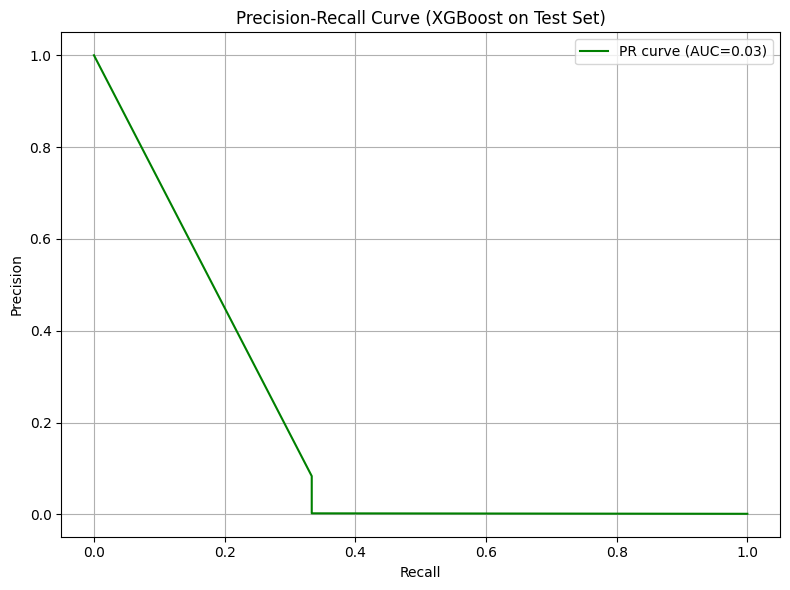

In [25]:
import os
import ast
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import xgboost as xgb

#  Locate CSV relative to current working directory (works in Jupyter or script)
script_dir = os.getcwd()  # current folder of your notebook or script
parent_dir = os.path.dirname(script_dir)
transactions_dir = os.path.join(parent_dir, "dataset", "transactions")
os.makedirs(transactions_dir, exist_ok=True)  # optional: ensure folder exists
csv_path = os.path.join(transactions_dir, "transactions.csv")

#  Print and check the CSV path
print(f" Calculated CSV path: {csv_path}")
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f" transactions.csv not found at: {csv_path}")

#  Load your synthetic dataset
df = pd.read_csv(csv_path)
print(f" Loaded transactions CSV with shape: {df.shape}")


#  Feature matrix X and target y
X = df[["amount"]].copy()
y = df["label"]


#  Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.30, random_state=42
)
print(f" Train shape: {X_train.shape}, Test shape: {X_test.shape}")

#  10) Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Compute scale_pos_weight for class imbalance
neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / max(pos, 1)
print(f" Calculated scale_pos_weight: {scale_pos_weight:.2f}")

#  Train XGBoost model
clf = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="aucpr",
   
)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
clf.fit(
    X_train_scaled, y_train,
    eval_set=eval_set,
)
print(" XGBoost model trained!")

#  Evaluate on test set
y_probs = clf.predict_proba(X_test_scaled)[:, 1]
pr_auc = average_precision_score(y_test, y_probs)
print(f" PR-AUC on test set: {pr_auc:.4f}")

#  Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"PR curve (AUC={pr_auc:.2f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost on Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


WITH FEATURES

 Calculated CSV path: d:\karsaazassignment\dataset\transactions\transactions.csv
 Loaded transactions CSV with shape: (8010, 5)
 Train shape: (5607, 3), Test shape: (2403, 3)
 Calculated scale_pos_weight: 800.00
[0]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[1]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[2]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[3]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[4]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[5]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[6]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[7]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[8]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[9]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[10]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[11]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[12]	validation_0-aucpr:0.58333	validation_1-aucpr:0.86696
[13]	validation_0-aucpr:0.58333

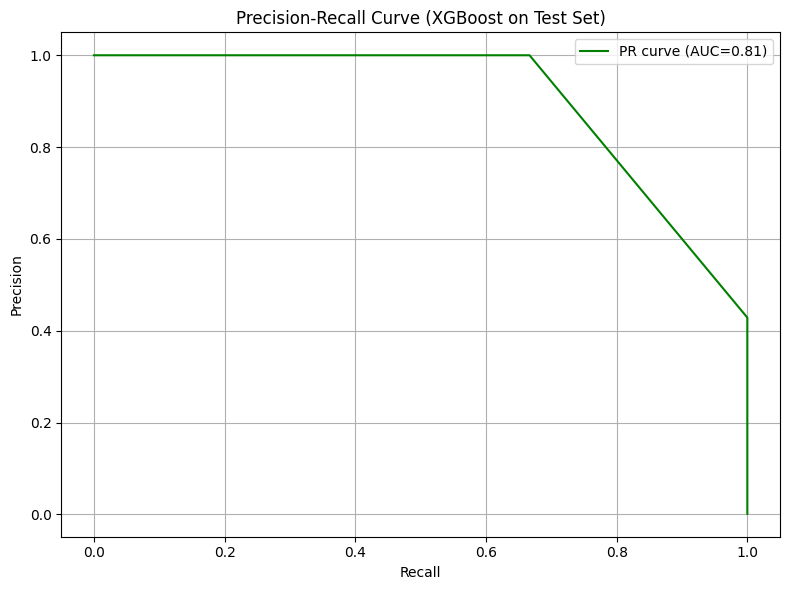

In [ ]:
import os
import ast
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import xgboost as xgb

# Locate CSV relative to current working directory (works in Jupyter or script)
script_dir = os.getcwd()  # current folder of your notebook or script
parent_dir = os.path.dirname(script_dir)
transactions_dir = os.path.join(parent_dir, "dataset", "transactions")
os.makedirs(transactions_dir, exist_ok=True)  # optional: ensure folder exists
csv_path = os.path.join(transactions_dir, "transactions.csv")

# Print and check the CSV path
print(f" Calculated CSV path: {csv_path}")
if not os.path.isfile(csv_path):
    raise FileNotFoundError(f" transactions.csv not found at: {csv_path}")

#  Load your synthetic dataset
df = pd.read_csv(csv_path)
print(f" Loaded transactions CSV with shape: {df.shape}")

#  Parse geo column back into lat/lon
geo_tuples = df["geo"].apply(ast.literal_eval)
df["geo_lat"] = geo_tuples.apply(lambda x: x[0])
df["geo_lon"] = geo_tuples.apply(lambda x: x[1])

#  Create device_tx_count feature (device reuse frequency)
device_freq = df["device_id"].value_counts()
df["device_tx_count"] = df["device_id"].map(device_freq)

# Compute geo_distance 
R = 6371  # Earth mean radius in km

lat1 = np.radians(25.0)
lon1 = np.radians(67.0)
lat2 = np.radians(df["geo_lat"])
lon2 = np.radians(df["geo_lon"])

dlat = lat2 - lat1
dlon = lon2 - lon1
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
c = 2 * np.arcsin(np.sqrt(a))
df["geo_distance"] = R * c

# Feature matrix X and target y
X = df[["amount", "device_tx_count", "geo_distance"]].copy()
y = df["label"]

#  Apply feature weighting
X["amount"] *= 2             # upweight amount
X["geo_distance"] *= 1.5       # emphasize suspicious distances

#  Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.30, random_state=42
)
print(f" Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compute scale_pos_weight for class imbalance
neg, pos = np.bincount(y_train.astype(int))
scale_pos_weight = neg / max(pos, 1)
print(f" Calculated scale_pos_weight: {scale_pos_weight:.2f}")

#  Train XGBoost model
clf = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=4,
    learning_rate=0.1,
    scale_pos_weight=scale_pos_weight,
    objective="binary:logistic",
    eval_metric="aucpr",
    random_state=42,
    n_jobs=-1
)

eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]
clf.fit(
    X_train_scaled, y_train,
    eval_set=eval_set,
)
print(" XGBoost model trained!")

#  Evaluate on test set
y_probs = clf.predict_proba(X_test_scaled)[:, 1]
pr_auc = average_precision_score(y_test, y_probs)
print(f" PR-AUC on test set: {pr_auc:.4f}")

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"PR curve (AUC={pr_auc:.2f})", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (XGBoost on Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
